In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, Birch, DBSCAN,MiniBatchKMeans, MeanShift, OPTICS,SpectralClustering
from sklearn.mixture import GaussianMixture

from sklearn.datasets import make_classification


In [5]:
X,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,n_redundant=0,n_informative=1,random_state=42)


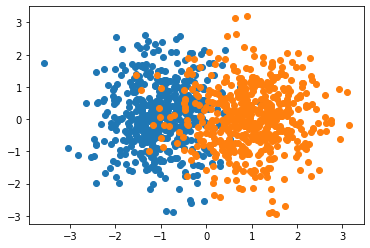

In [18]:
for class_val in range(2):
    row_idx=np.where(y==class_val)
    plt.scatter(X[row_idx,0],X[row_idx,1])

In [11]:
row_ix = np.where(y == 1)

In [17]:
X[row_ix,0].shape

(1, 505)

In [98]:
kmeans=KMeans(n_clusters=2,init='k-means++',n_init=10,max_iter=300)

In [99]:
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,random_state=4)
kmeans.fit(X)

KMeans(n_clusters=2)

In [100]:
yhat=kmeans.predict(X)

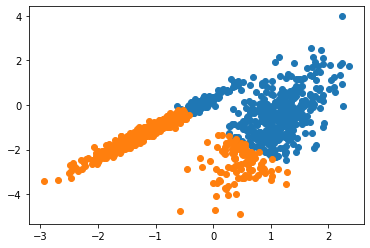

In [101]:
clusters = np.unique(yhat)
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])


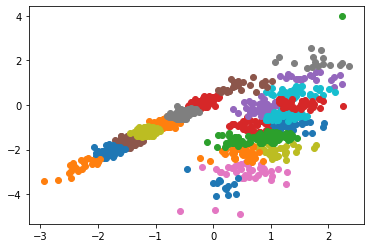

In [64]:
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
aff_prop=AffinityPropagation(damping=0.8)
aff_prop.fit(X)
yhat=aff_prop.predict(X)
clusters = np.unique(yhat)
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

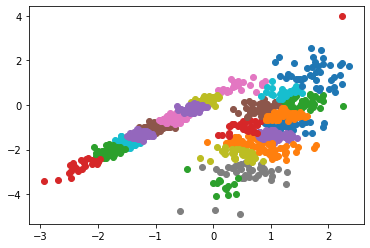

In [65]:
aff_prop=AffinityPropagation(damping=0.9)
aff_prop.fit(X)
yhat=aff_prop.predict(X)
clusters = np.unique(yhat)
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

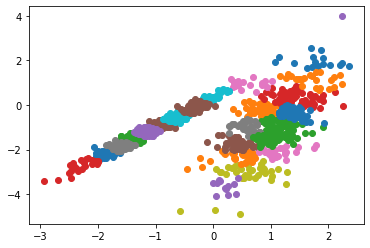

In [66]:
aff_prop=AffinityPropagation(damping=0.6)
aff_prop.fit(X)
yhat=aff_prop.predict(X)
clusters = np.unique(yhat)
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

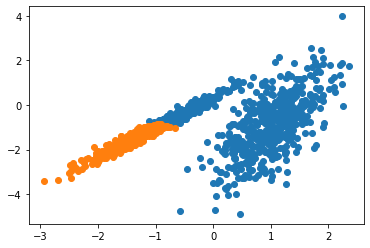

In [71]:
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
agg_clus=AgglomerativeClustering(n_clusters=2)
agg_clus.fit(X)
yhat=agg_clus.fit_predict(X)
clusters = np.unique(yhat)
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

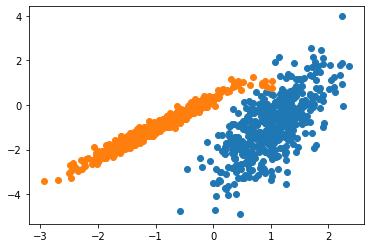

In [72]:
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

birch=Birch(threshold=0.01,n_clusters=2)
birch.fit(X)
yhat=birch.predict(X)
clusters = np.unique(yhat)
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

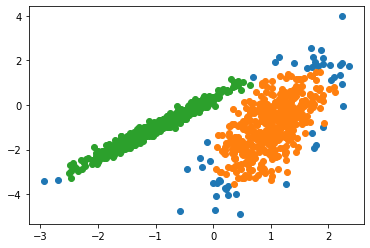

In [83]:
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
dbscan=DBSCAN(eps=0.30,min_samples=9)
dbscan.fit(X)
yhat=dbscan.fit_predict(X)
clusters = np.unique(yhat)
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

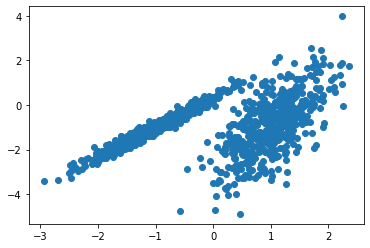

In [102]:
kmeans.cluster_centers_

array([[ 0.89810406, -0.31883392],
       [-0.88185955, -1.61041581]])

In [104]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

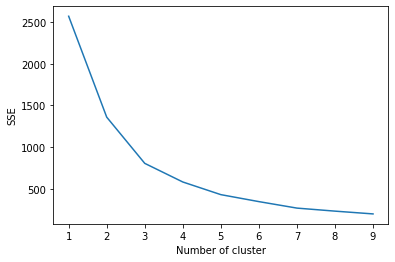

In [114]:
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
#     X["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [127]:
from sklearn.datasets import fetch_20newsgroups

# load data
train = fetch_20newsgroups(subset='train', shuffle=False)
test = fetch_20newsgroups(subset='test', shuffle=False)

# parse data to pandas DataFrames
newsgroup_test = pd.DataFrame({'article':test.data, 'class_index':test.target})
newsgroup_train = pd.DataFrame({'article':train.data, 'class_index':train.target})

# # load labels with keywords
# labels = pd.read_csv('20newsgroups_keywords.csv',sep=';')

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
np.random.seed(777)
# dataset = fetch_20newsgroups(subset='all', shuffle=True, download_if_missing=False)

In [156]:
texts=dataset.data

In [157]:
targets=dataset.target

In [159]:
target_names=dataset.target_names

In [160]:
vectorizer=TfidfVectorizer(stop_words='english')
X=vectorizer.fit_transform(texts)

In [158]:
targets

array([10,  3, 17, ...,  3,  1,  7])

In [162]:
X.shape

(18846, 173451)

In [168]:
n_clusters=20
model=KMeans(n_clusters=n_clusters,init='k-means++',max_iter=100,n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=20, n_init=1)

In [171]:
order_centroids=model.cluster_centers_.argsort()[:,::-1]

In [181]:
order_centroids

141769

In [174]:
terms=vectorizer.get_feature_names()
len(terms)

173451

In [5]:
# for i in range(n_clusters):
#     print(f"Cluster {i}: ")
#     for ind in order_centroids[i,:10]:
#         print(f"{terms[ind]}")

In [3]:
# target_names

In [4]:
# print (texts[400])

In [188]:
X=vectorizer.transform([texts[400]])
cluster=model.predict(X)[0]
print("Text belongs to cluster number {0}".format(target_names[14]))

Text belongs to cluster number sci.space


In [187]:
for ind in order_centroids[cluster, :10]:
    print(' %s' % terms[ind])

 windows
 file
 dos
 window
 files
 program
 edu
 com
 use
 ms


In [192]:
import gensim

In [211]:
f=gensim.utils.simple_preprocess(texts[400])

In [224]:
d=pd.DataFrame(dataset['data'])[0].apply(gensim.utils.simple_preprocess)

In [225]:
model=gensim.models.Word2Vec(window=10,min_count=2,workers=4)

In [226]:
model.build_vocab(d,progress_per=1000)

In [227]:
model.epochs

5

In [229]:
model.train(d,total_examples=model.corpus_count,epochs=model.epochs)

(21259680, 26137850)

In [230]:
model.save('word2vec_news.model')

In [237]:
model.wv.most_similar("kill")

[('defend', 0.7388551831245422),
 ('shoot', 0.7152785658836365),
 ('die', 0.7060646414756775),
 ('hide', 0.7031716704368591),
 ('justify', 0.6778703927993774),
 ('commit', 0.6729475855827332),
 ('innocent', 0.6619787216186523),
 ('steal', 0.6600019931793213),
 ('killing', 0.6506216526031494),
 ('fight', 0.649591326713562)]

In [244]:
model.wv.similarity("king",'emperor')

0.2726702